<a href="https://colab.research.google.com/github/Shiva0krishna/chatbot-finetuned-llm/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow import keras
import glob
import pandas as pd

In [ ]:
# capacity=np.array([9,8,7,6,5,4,3,2,1])
# speed=np.array([1,2,3,4,5,6,7,8,9])

# model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

# model.compile(optimizer='sgd', loss='mean_squared_error')

# model.fit(capacity,speed,epochs=5)

# print(int(model.predict(np.array([7]))))

# import matplotlib.pyplot as plt
# plt.plot(capacity,speed,'o')
# plt.show()


In [10]:
PATH ="/content/"
print(os.listdir(PATH))

['.config', 'fashion-mnist_train.csv', 'train-labels-idx1-ubyte', 't10k-images-idx3-ubyte', 't10k-labels-idx1-ubyte', 'fashion-mnist_test.csv', 'train-images-idx3-ubyte', 'sample_data']


In [25]:
train_data = PATH + "fashion-mnist_train.csv"
test_data = PATH + "fashion-mnist_test.csv"
train_df = pd.read_csv(train_data)
test_df = pd.read_csv(test_data)

print("Fashion MNIST train -  rows:",train_df.shape[0]," columns:", train_df.shape[1])
print("Fashion MNIST test -  rows:",test_df.shape[0]," columns:", test_df.shape[1])

Fashion MNIST train -  rows: 60000  columns: 785
Fashion MNIST test -  rows: 10000  columns: 785


In [29]:
# Create a dictionary for each type of label
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

def get_classes_distribution(data):
    # Get the count for each label
    label_counts = data["label"].value_counts()

    # Get total number of samples
    total_samples = len(data)

    dist=[]
    # Count the number of items in each class
    for i in range(len(label_counts)):
        label = labels[label_counts.index[i]]
        count = label_counts.values[i]
        percent = (count / total_samples) * 100
        print("{:<20s}:   {} or {}%".format(label, count, percent))
        dist.append({"label": label, "count": count, "percentage": percent})
    return dist


Pullover            :   6000 or 10.0%
Ankle Boot          :   6000 or 10.0%
Shirt               :   6000 or 10.0%
T-shirt/top         :   6000 or 10.0%
Dress               :   6000 or 10.0%
Coat                :   6000 or 10.0%
Sandal              :   6000 or 10.0%
Bag                 :   6000 or 10.0%
Sneaker             :   6000 or 10.0%
Trouser             :   6000 or 10.0%
[{'label': 'Pullover', 'count': 6000, 'percentage': 10.0}, {'label': 'Ankle Boot', 'count': 6000, 'percentage': 10.0}, {'label': 'Shirt', 'count': 6000, 'percentage': 10.0}, {'label': 'T-shirt/top', 'count': 6000, 'percentage': 10.0}, {'label': 'Dress', 'count': 6000, 'percentage': 10.0}, {'label': 'Coat', 'count': 6000, 'percentage': 10.0}, {'label': 'Sandal', 'count': 6000, 'percentage': 10.0}, {'label': 'Bag', 'count': 6000, 'percentage': 10.0}, {'label': 'Sneaker', 'count': 6000, 'percentage': 10.0}, {'label': 'Trouser', 'count': 6000, 'percentage': 10.0}]


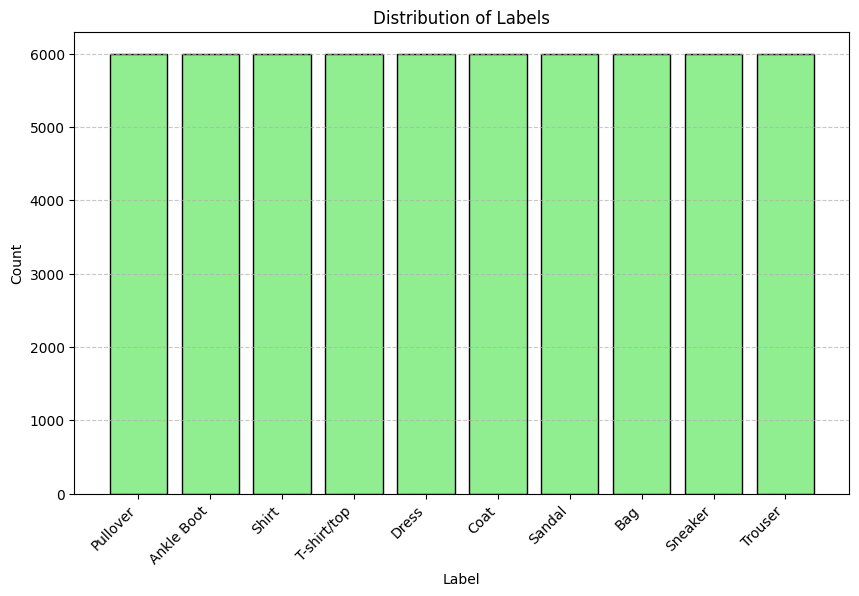

In [37]:
dist_data =get_classes_distribution(train_df)
print(dist_data)
label_names = [item['label'] for item in dist_data]
label_counts = [item['count'] for item in dist_data]
plt.figure(figsize=(10, 6))
plt.bar(label_names, label_counts, color='lightgreen', edgecolor='black')

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

T-shirt/top         :   1000 or 10.0%
Trouser             :   1000 or 10.0%
Pullover            :   1000 or 10.0%
Dress               :   1000 or 10.0%
Bag                 :   1000 or 10.0%
Shirt               :   1000 or 10.0%
Sandal              :   1000 or 10.0%
Coat                :   1000 or 10.0%
Sneaker             :   1000 or 10.0%
Ankle Boot          :   1000 or 10.0%
[{'label': 'T-shirt/top', 'count': 1000, 'percentage': 10.0}, {'label': 'Trouser', 'count': 1000, 'percentage': 10.0}, {'label': 'Pullover', 'count': 1000, 'percentage': 10.0}, {'label': 'Dress', 'count': 1000, 'percentage': 10.0}, {'label': 'Bag', 'count': 1000, 'percentage': 10.0}, {'label': 'Shirt', 'count': 1000, 'percentage': 10.0}, {'label': 'Sandal', 'count': 1000, 'percentage': 10.0}, {'label': 'Coat', 'count': 1000, 'percentage': 10.0}, {'label': 'Sneaker', 'count': 1000, 'percentage': 10.0}, {'label': 'Ankle Boot', 'count': 1000, 'percentage': 10.0}]


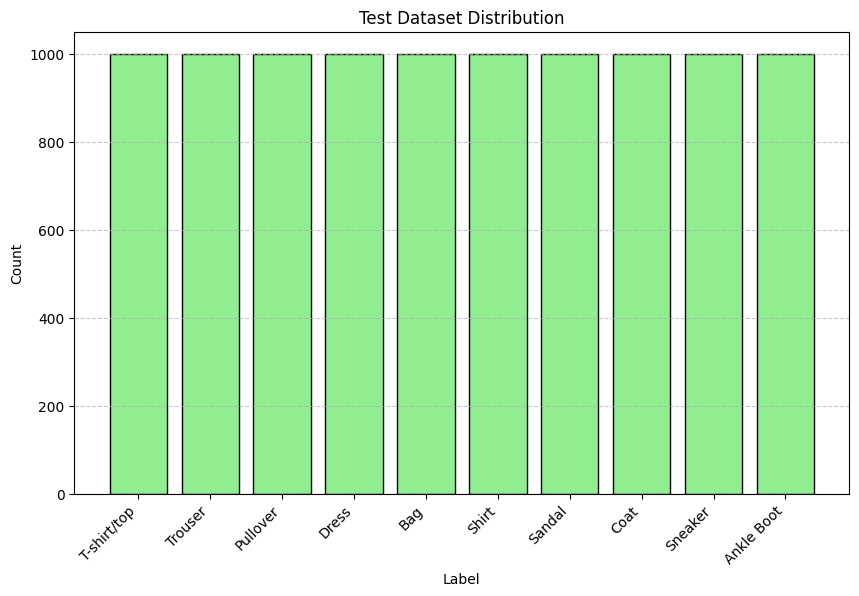

In [44]:
import matplotlib.pyplot as plt
test_dist = get_classes_distribution(test_df)
print(test_dist)
label_names = [item['label'] for item in test_dist]
label_counts = [item['count'] for item in test_dist]
plt.figure(figsize=(10, 6))
plt.bar(label_names, label_counts, color='lightgreen', edgecolor='black')
plt.title("Test Dataset Distribution")
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [61]:
def sample_images_data(data):
    # An empty list to collect some samples
    sample_images = []
    sample_labels = []

    # Iterate over the keys of the labels dictionary defined in the above cell
    for k in labels.keys():
        # Get four samples for each category
        samples = data[data["label"] == k].head(10000) # Access the 'label' column of the DataFrame
        # Append the samples to the samples list
        for j, s in enumerate(samples.values):
            # First column contain labels, hence index should start from 1
            img = np.array(samples.iloc[j, 1:]).reshape(28,28) # Assuming IMG_ROWS and IMG_COLS are defined elsewhere
            sample_images.append(img)
            sample_labels.append(samples.iloc[j, 0])

    print("Total number of sample images to plot: ", len(sample_images))
    return sample_images, sample_labels

# Pass the DataFrame to the function, not the file path
train_sample_images, train_sample_labels = sample_images_data(train_df)

Total number of sample images to plot:  60000


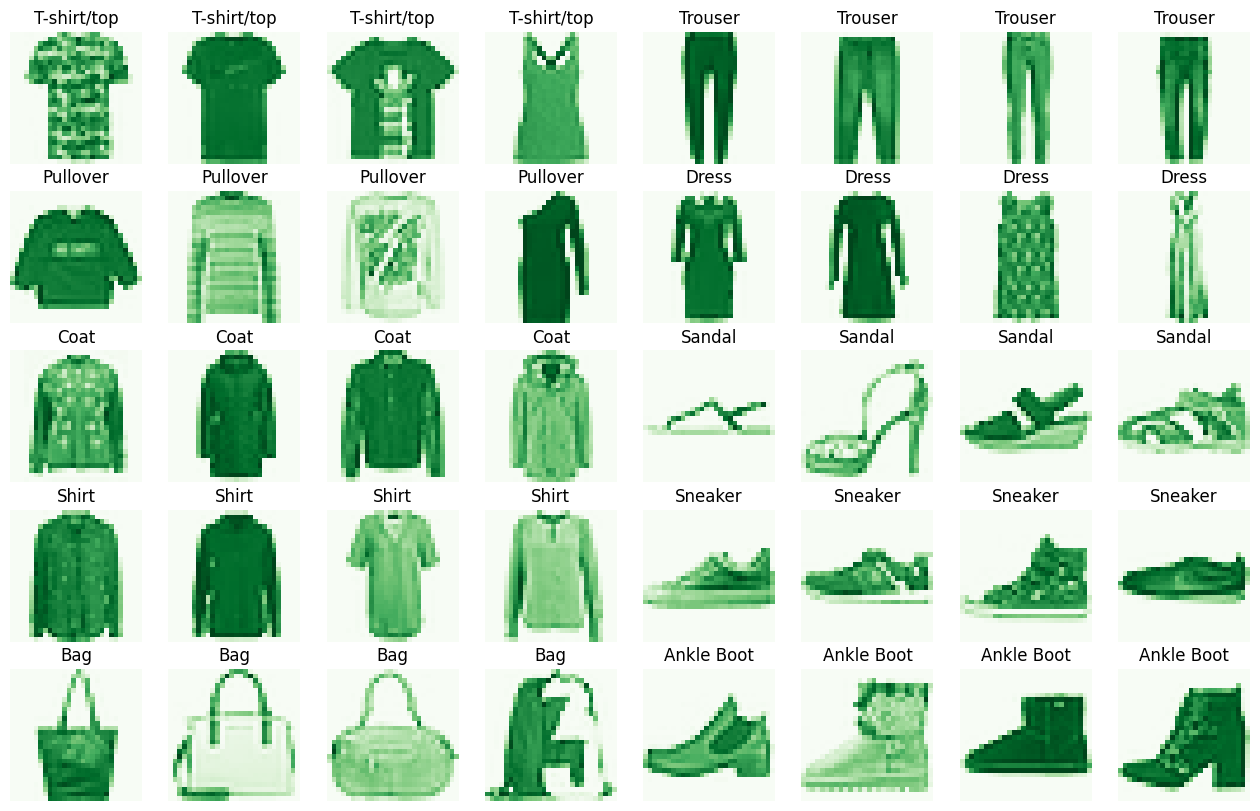

In [48]:
def plot_sample_images(data_sample_images,data_sample_labels,cmap="Blues"):
    # Plot the sample images now
    f, ax = plt.subplots(5,8, figsize=(16,10))

    for i, img in enumerate(data_sample_images):
        ax[i//8, i%8].imshow(img, cmap=cmap)
        ax[i//8, i%8].axis('off')
        ax[i//8, i%8].set_title(labels[data_sample_labels[i]])
    plt.show()

plot_sample_images(train_sample_images,train_sample_labels, "Greens")

In [67]:
# Reshape the training data into the expected format
train_sample_images = np.array(train_sample_images)
train_sample_labels = np.array(train_sample_labels)

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Now fit the model with the reshaped data
model.fit(train_sample_images,train_sample_labels, epochs=30)

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6664 - loss: 9.1159
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7400 - loss: 0.6925
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7858 - loss: 0.5929
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8133 - loss: 0.5365
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8217 - loss: 0.5218
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8355 - loss: 0.4852
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8398 - loss: 0.4763
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8395 - loss: 0.4845
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8410 - loss: 0.4732
Epoch 10/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8404 - loss: 0.4690
Epoch 11/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8435 - loss: 0.4562
Epoch 12/30
1875/1875 ━━

In [68]:
model.evaluate(train_sample_images,train_sample_labels)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8394 - loss: 0.4239


[0.3849360942840576, 0.8675000071525574]

In [70]:
model.save("fashion_mnist_model.h5")